In [1]:
exec(open("../../../python/FNC_init.py").read())

Now we use an initial condition with a larger bump. Note that the scale on the $y$-axis is much different for this solution.

In [2]:
from scipy.integrate import solve_ivp
rho_c, rho_m, q_m, ep = (1080, 380, 10000, 0.02)
Q0prime = (
    lambda rho: q_m * 4 * rho_c**2 * (rho_c - rho_m) * rho_m * (rho_m - rho)
    / (rho * (rho_c - 2 * rho_m) + rho_c * rho_m) ** 3
)
x, Dx, Dxx = FNC.diffper(800, [0, 4])
ode = lambda t, rho: -Q0prime(rho) * (Dx @ rho) + ep * (Dxx @ rho)

In [3]:
rho_init = 400 + 80 * exp(-16 * (x - 3) ** 2)
sol = solve_ivp(ode, [0, 0.5], rho_init, method="Radau", dense_output=True)

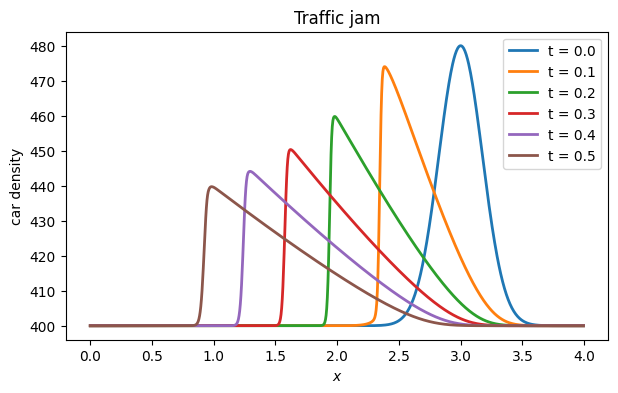

In [4]:
for t in linspace(0, 0.5, 6):
    plot(x, sol.sol(t), label=f"t = {t:.1f}")
xlabel("$x$"),  ylabel("car density")
legend(),  title("Traffic jam");

In [5]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, rho_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$")
ax.set_ylabel("density")
ax.set_ylim(400, 480)
ax.set_title("Traffic jam")
def snapshot(t):
    curve.set_ydata(sol.sol(t))
    time_text.set_text(f"t = {t:.2f}")

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 0.5, 101))
anim.save("traffic-jam.mp4", fps=30)
close()